
## Project: Build a Traffic Sign Recognition Classifier


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
import random as rnd
import matplotlib.image as mpimg
import pandas as pd
from scipy.ndimage import zoom
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator

C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [33]:
tf.__version__

'1.5.0'

---

## Step 1:  Load the data set: Since the dataset is a pickled data that has a dictionary with 4 key pairs, I will use the Pickle Library to load data:

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

 

In [2]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file,mode='rb') as f:
    train=pickle.load(f)
with open(validation_file,mode='rb') as f:
    valid=pickle.load(f)
with open(testing_file,mode='rb') as f:
    test=pickle.load(f)
x_train,y_train=train['features'],train['labels']
x_valid,y_valid=valid['features'],valid['labels']
x_test,y_test=test['features'],test['labels']

#assert weathers the number of training images and labels are equal
assert(len(x_train)==len(y_train))
assert(len(x_valid)==len(y_valid))
assert(len(x_test)==len(y_test))

##### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
print()
print('Image shape{}'.format(x_train[0].shape))
print('Trainini set {} samples'.format(len(x_train)))
print('Validation set {} samples'.format(len(x_valid)))
print('Test set {} samples'.format(len(x_test)))


Image shape(32, 32, 3)
Trainini set 34799 samples
Validation set 4410 samples
Test set 12630 samples


In [4]:

print("the maximum value for each image in the dataset ",np.max(x_train))
print("the minimum value for each image in the dataset ",np.min(x_train))


the maximum value for each image in the dataset  255
the minimum value for each image in the dataset  0


In [5]:
signnames_file='signnames.csv'
data = pd.read_csv(signnames_file,index_col=False) 
# Preview the first 5 lines of the loaded data 
data.head(8)

ClassId                     SignName
0        0         Speed limit (20km/h)
1        1         Speed limit (30km/h)
2        2         Speed limit (50km/h)
3        3         Speed limit (60km/h)
4        4         Speed limit (70km/h)
5        5         Speed limit (80km/h)
6        6  End of speed limit (80km/h)
7        7        Speed limit (100km/h)

### 2.Explore, summarize and visualize the dataset

Below is shown some images from the dataset with the coressponding captions:


C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


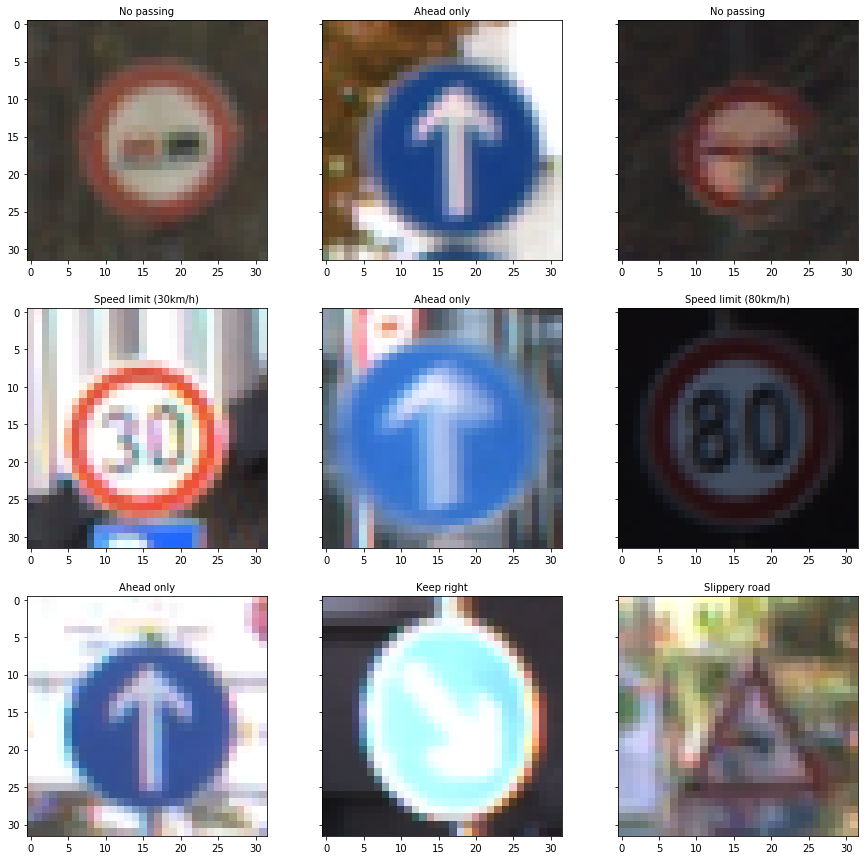

In [6]:
rows = 3
cols = 3
fig, axis = plt.subplots(rows,cols,sharey=True)
fig.set_size_inches(15,15)
for i in range(rows*cols):
    index=rnd.randint(0,len(x_train))
    img=x_train[index]
    label= data.iloc[int(y_train[index])][1]
    axis[int(i/rows)][i%cols].imshow(img,cmap='gray')
    axis[int(i/rows)][i%cols].set_title(str(label),fontsize=10)

    
fig.show()
#fig.savefig('./examples/1.png')


I was encouraged to to print several images for one label and try to  pay attention how the images look like. This is important because I need to know the characteristics of the images that use for training the model.

In [7]:
Index_of_label=[i for i, x in enumerate(y_train) if x == 5]
Index_of_label=shuffle(Index_of_label)

rows = 3
cols = 3
fig, axis = plt.subplots(rows,cols,sharey=True)
fig.set_size_inches(15,15)
for i in range(rows*cols):
    img=x_train[Index_of_label[i]]
    label= data.iloc[int(y_train[Index_of_label[i]])][1]
    axis[int(i/rows)][i%cols].imshow(img)
    axis[int(i/rows)][i%cols].set_title(str(label),fontsize=10)
#plt.savefig('./examples/2.png')

**As seen ,the contrast of  images is bad which must be imporved.**

### 3.Pre-processing of the dataset 


First, I will examine the distribution of the labels and look at the comparative distribution of each individual class in training, validation, and test data set.

In [8]:
#number of bins is the number of classes
n_bins = len(np.unique(y_train))


#draw a subplot table of 1x3 
fig, axis = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=[15,5])

axis[0].set_title('Comparing Trainig set  and Validation set distributaion',fontsize=12)
axis[0].set_ylabel('Number of the images')
axis[0].set_xlabel(' class of the signs')


axis[1].set_title('Comparing Validation set  and Test set distributaion',fontsize=10),
axis[1].set_ylabel('Number of the images')
axis[1].set_xlabel('class of the signs')

x_training_h,y_training_h,_=axis[0].hist(y_train,bins=n_bins)
x_valid_h,y_valid_h,_=axis[0].hist(y_valid,bins=n_bins)


x_test_h,y_test_h,_=axis[1].hist(y_test,bins=n_bins)
x_valid_h,y_valid_h,_=axis[1].hist(y_valid,bins=n_bins)

#fig.savefig('./examples/3.png')




C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


Then I used the pandas library to find the number of the maximum and minimum traffic signs class in the training , validation and test dataset:


In [9]:
dataframe=pd.DataFrame({'Training data': {'Maximum instances':x_training_h.max(),'Maximum class':data.iloc[int(y_training_h.max())][1],'Minimum instances':x_training_h.min(),'Minimum Class':data.iloc[int(y_training_h.min())][1]},
                       'Validation data': {'Maximum instances':x_valid_h.max(),'Maximum class':data.iloc[int(y_valid_h.max())][1],'Minimum instances':x_valid_h.min(),'Minimum Class':data.iloc[int(y_valid_h.min())][1]},
                       'Test data': {'Maximum instances':x_test_h.max(),'Maximum class':data.iloc[int(y_test_h.max())][1],'Minimum instances':x_test_h.min(),'Minimum Class':data.iloc[int(y_test_h.min())][1]}})

In [10]:
dataframe.T

Maximum class  \
Test data        End of no passing by vehicles over 3.5 metric ...   
Training data    End of no passing by vehicles over 3.5 metric ...   
Validation data  End of no passing by vehicles over 3.5 metric ...   

                Maximum instances         Minimum Class Minimum instances  
Test data                     750  Speed limit (20km/h)                60  
Training data                2010  Speed limit (20km/h)               180  
Validation data               240  Speed limit (20km/h)                30

There are three common forms of **data preprocessing:**

1. Mean subtraction is the most common form of preprocessing. It involves subtracting the mean across every individual feature in the data, and has the geometric interpretation of centering(the cloud of data around the origin along every dimension).
2. Normalization refers to normalizing the data dimensions so that they are of approximately the same scale(for example in range from 0 to 1).
3. PCA and Whitening is another form of preprocessing. In this process, the data is first centered as described above. Then, we can compute the covariance matrix that tells us about the correlation structure in the data.


Befor normalizing all images I converted all images to the LAB color system(L for lightness and a and b for the color opponents green–red and blue–yellow) to improve the contrast of all images by using CLAHE (Contrast Limited Adaptive Histogram Equalization) from the opencv library (to only Lightness component and convert back the image to RGB) then I normalized so that the data has mean zero and equal variance.

In [11]:
def LAB_preprocess(data):
    clahe=cv2.createCLAHE(clipLimit=1.2,tileGridSize=(3,3))
    data=data[:,:,:,:]#to gray scale
    dataset=[]
    for i in range (data.shape[0]):
        
        lab = cv2.cvtColor(data[i,:,:,:], cv2.COLOR_BGR2LAB)

        lab_planes = cv2.split(lab)

        lab_planes[0] = clahe.apply(lab_planes[0],)

        lab = cv2.merge(lab_planes)

        bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

        dataset.append(bgr)
    

    return dataset

In [12]:
x_train=LAB_preprocess(x_train)
x_valid=LAB_preprocess(x_valid)
x_test=LAB_preprocess(x_test)

#### After converting all images to the LAB color system and applying CLAHE,the contrast of all images imporved.

In [13]:
rows = 3
cols = 3
fig, axis = plt.subplots(rows,cols,sharey=True)
fig.set_size_inches(15,15)
for i in range(rows*cols):
    index=rnd.randint(0,len(x_train))
    img=x_train[index]
    label= data.iloc[int(y_train[index])][1]
    axis[int(i/rows)][i%cols].imshow(img,cmap='gray')
    axis[int(i/rows)][i%cols].set_title(str(label),fontsize=10)

    
fig.show()
#fig.savefig('./examples/4.png')


C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [14]:
def normalize(data):
    data=np.array(data)
    print(data.shape)
    data=data.astype('float64')  
    data-= np.mean(data,axis=0)# zero-center the data (important)
    data /=np.std(data,axis=0)
    return data

In [15]:
x_train=normalize(x_train)#new = (1/(2*2.25)) * x_train[0] + 0.5
x_valid=normalize(x_valid)
x_test=normalize(x_test)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [16]:
print("the maximum value for each image in the dataset ",np.max(x_train))
print("the minimum value for each image in the dataset ",np.min(y_train))

the maximum value for each image in the dataset  3.832561342409173
the minimum value for each image in the dataset  0


#### Data Augmentation
From the histograms above, we can  see that both training and validation set have similar distribution of traffic sign samples but problem is that there is a huge variability of the distribution between class instances within the dataset,maybe we can develop augmentation techniques to equalize them.


Because of inblancing in the class instances, I decided to develop the augmentation methods like salt papper noise, rotation and translation methods with help of openc cv library and using Tensorflow the random_brightness and flip_left_right methods for data augmentation.

In [17]:
def rotate_image(image):
    img=np.copy(image)
    angel=rnd.randint(-20,20)
    w,h,c=img.shape
    Rot_m=cv2.getRotationMatrix2D((w/2,h/2),angel,1)
    img=cv2.warpAffine(img,Rot_m,(w,h))
    return img
    
def translate_image(image):
    img=np.copy(image)
    w,h,c=image.shape
    trans_range=rnd.randint(-20,+20)
    trx_x=trans_range+np.random.uniform()-trans_range/2
    trx_y=trans_range+np.random.uniform()-trans_range/2
    Tran_M=np.float32([[1,0,trx_x],[0,1,trx_y]])
    img=cv2.warpAffine(img,Tran_M,(w,h))
  
    return img

def add_salt_pepper_noise(image):
    img=np.copy(image)
    dice = rnd.randint(0, 100)
    salt_vs_pepper = 0.20
    amount = 0.030
    num_salt = np.ceil(amount * img.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * img.size * (1.0 - salt_vs_pepper))


    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
    img[coords[0], coords[1],:] = 1

    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
    img[coords[0], coords[1],:] = 0

    return img

def horizontal_flip(x:tf.Tensor):
    return tf.image.flip_left_right(x)

def random_brightness(x:tf.Tensor):
    return tf.image.random_brightness(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


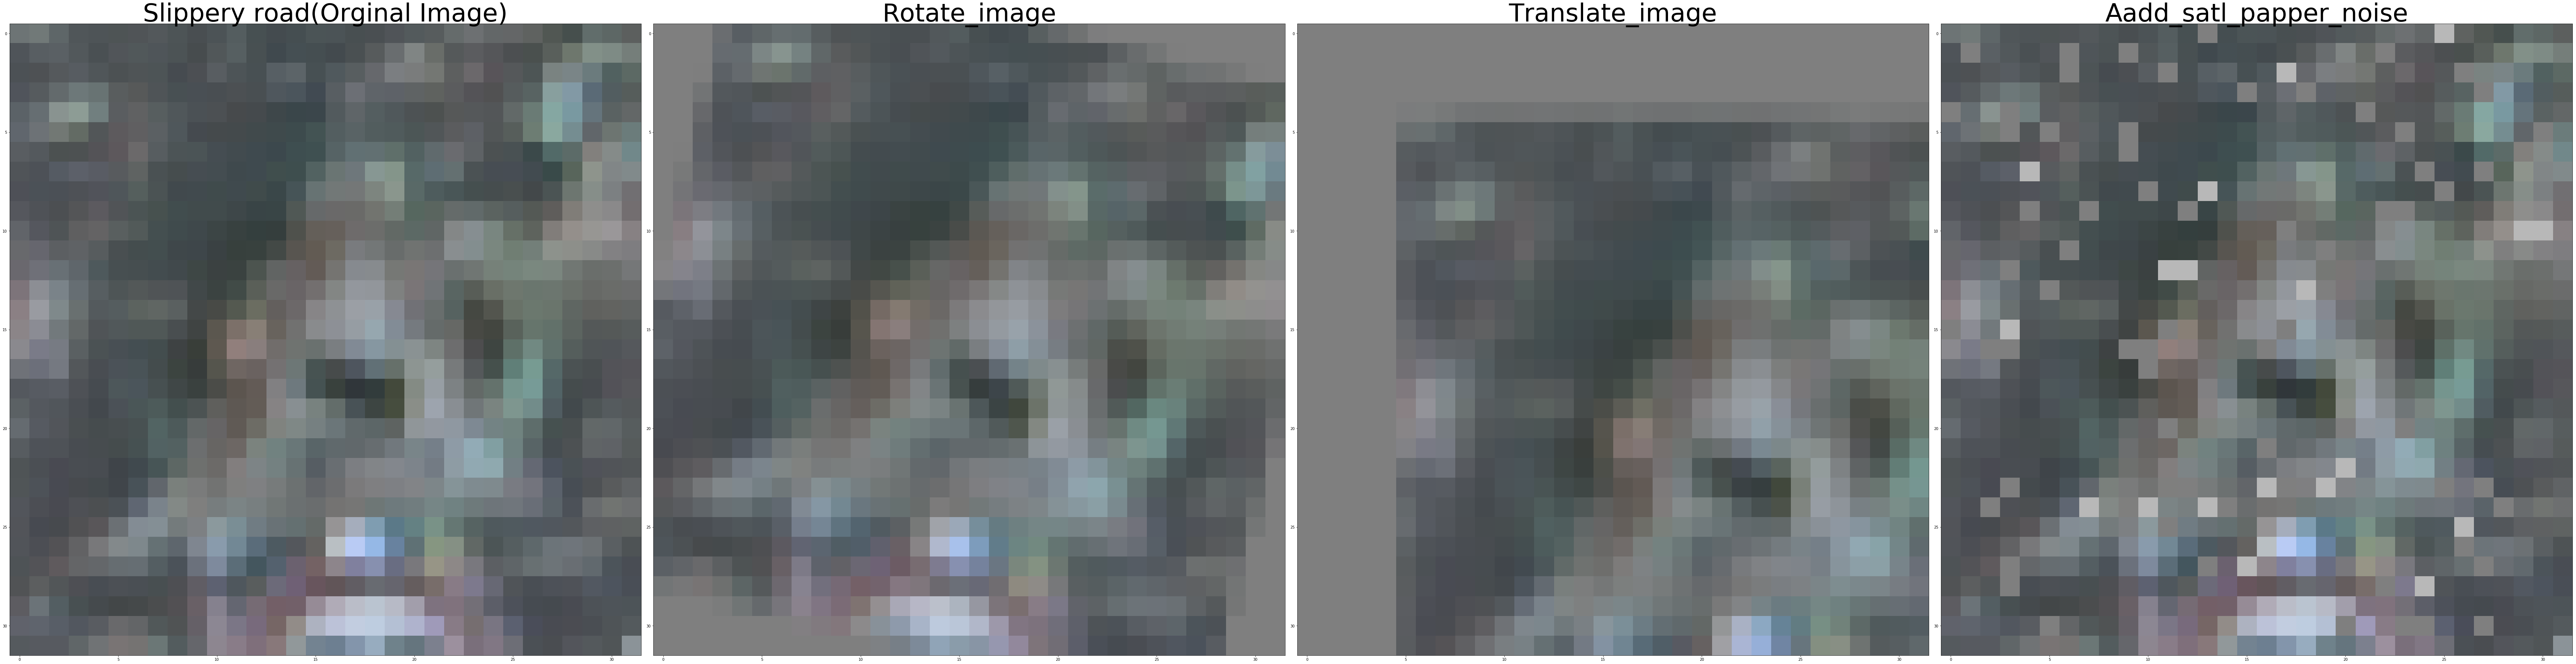

In [18]:

fig, axis = plt.subplots(1,4,sharey=False,tight_layout=True,figsize=(100,100))
#fig.set_size_inches(100,100)
for i in range(3):
    index=rnd.randint(0,len(x_train))
    image=x_train[index]
    label=data.iloc[y_train[index]][1]
    axis[0].imshow((1/(2*2.25)) * image + 0.5)
    
    axis[0].set_title(str(label)+'(Orginal Image)',fontsize=70)
    Rotated=rotate_image(image)
    axis[1].imshow((1/(2*2.25)) * Rotated + 0.5)
    axis[1].set_title('Rotate_image',fontsize=70)
    
    translated=translate_image(image)
    axis[2].imshow((1/(2*2.25)) * translated + 0.5)
    axis[2].set_title('Translate_image',fontsize=70)
   
    salt_pepper_noise=add_salt_pepper_noise(image)
    axis[3].imshow((1/(2*2.25)) * salt_pepper_noise + 0.5)
    axis[3].set_title('Aadd_satl_papper_noise',fontsize=70)
    
plt.show()
#fig.savefig('./examples/5.png')

### 4. Design, train and test a model architecture

#### Model architecture

In [35]:
Epoch=10
learning_rate=1e-03
Batch_size=256
initializer = tf.contrib.layers.xavier_initializer()


In [36]:
weights={'conv1':tf.Variable(initializer([7,7,3,64])),
         'fc1':tf.Variable(initializer([49024,1024])),
         'fc2':tf.Variable(initializer([1024,512])),
         'fc3':tf.Variable(initializer([512,128])),
         'out':tf.Variable(initializer([128,43]))}

biasses={'Bconv1':tf.Variable(tf.zeros([64])),
         'Bfc1':tf.Variable(tf.zeros([1024])),
         'Bfc2':tf.Variable(tf.zeros([512])),
         'Bfc3':tf.Variable(tf.zeros([128])),
         'Bout':tf.Variable(tf.zeros([43]))}

In [37]:
from keras.layers import Conv2D
from keras.layers import MaxPool2D
import keras
from keras.utils.vis_utils import plot_model
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    #shape=(?, 16, 16, 64)
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    #shape=(?, 16, 16, 96)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)
   # shape=(?, 16, 16, 128)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)
    #shape=(?, 16, 16, 32),
    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)
    #shape=(?, 16, 16, 32)
    output = tf.concat([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
 
    return output

The way I did to find the final model architecture was related to the accuracy of the model, as known, one of the best archituctues in the fied of deep learing that has achieved much attention is the inception module, for this reason I used the inception modules to increase the accuracy of my model.

<p align="center">
<img src="./examples/7.PNG" alt=" the inception module" />

<p align="center">

                                                      The inception module


In [38]:
def model(data):
    global weights,biasses
    
    incep1 = inception_module(data,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')#(?, 32, 32, 256)
    bincp1=tf.layers.batch_normalization(incep1)
    layer1=tf.nn.relu(bincp1)
    
    

    incep2 = inception_module(layer1,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b') #shape=(?, 32, 32, 480)
    bincep2=tf.layers.batch_normalization(incep2)
    layer2=tf.nn.relu(bincep2)
    layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    incep3 = inception_module(layer2,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=256,
                     filters_5x5_reduce=156,
                     filters_5x5=160,
                     filters_pool_proj=94,
                     name='inception_3c') #shape=(?, 16, 16, 766)
    
    bincep3=tf.layers.batch_normalization(incep3)
    layer3=tf.nn.relu(bincep3)


    
    layer4 = tf.nn.max_pool(layer3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')#shape=(?, 8, 8, 766)
   

   
    layer5=tf.contrib.layers.flatten(layer4) #(?, 49024)
    layer5=tf.add(tf.matmul(layer5,weights['fc1']),biasses['Bfc1'],name='fc1')
    layer5=tf.nn.relu(layer5)
    layer5=tf.nn.dropout(layer5,keep_prob=keep_prob)
    
    layer6=tf.add(tf.matmul(layer5,weights['fc2']),biasses['Bfc2'],name='fc2')
    layer6=tf.nn.relu(layer6)
    layer6=tf.nn.dropout(layer6,keep_prob=keep_prob)


    layer7=tf.add(tf.matmul(layer6,weights['fc3']),biasses['Bfc3'],name='fc3')
    layer7=tf.nn.relu(layer7)
    layer7=tf.nn.dropout(layer7,keep_prob=keep_prob)
    
    layer8=tf.add(tf.matmul(layer7,weights['out']),biasses['Bout'],name='out')
    
    print(layer8)

 
    return layer8 #(?, 43)
    


In [39]:
x=tf.placeholder(tf.float32,(None,32,32,3))
y=tf.placeholder(tf.int32,(None))
one_hot_y=tf.one_hot(y,43)
keep_prob=tf.placeholder(tf.float32)


I chosed Adam opzimizer **Adam (Adaptive Moment Estimation)** as the loss function, which divide the learning rate for a weight by a running average of the magnitudes of recent gradients for that weight. This helps in faster gradient descent and it is more accurate than SGD and GD.
    



In [40]:
logits=model(x)
croos_entropy=tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y,logits=logits)
loss_operation=tf.reduce_mean(croos_entropy)
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(loss_operation)
top_predictions = tf.nn.top_k(tf.nn.softmax(logits), k=5)
saver=tf.train.Saver()


Tensor("out_2:0", shape=(?, 43), dtype=float32)



For visualizing the model architecture, I tried to open the tensorboard environment (tensorboard --logdir=" the adress of log dir " --port 6006) and I got the below presented graph.


<p align="center">
<img src="./examples/6.png" alt=" the inception module" />
<p align="center">  


                                                          The model architecture

   |Layer| 	Description |	Input| 	Output|
   |-----|--------------|------|-------|
   |Inception with batch_normalization and relu  activation |	Inception3a |	(?,32,32,3) |	(?, 32, 32, 256)|
   | Inception with batch_normalization and relu  activation |	Inception3b |	(?,32,32,256) |	(?, 32, 32, 480)|
   | Max pooling |	 kernel: 2x2; stride:2x2; padding: Same;  | (?, 32, 32, 480)| 	(?, 16, 16, 480)|
   | Inception with batch_normalization and relu  activation 	|Inception3c |	(?, 16, 16, 480) |	(?, 16, 16, 766)|
   | Max pooling 	| kernel: 2x2; stride:2x2; padding: Same; |  (?, 16, 16, 766) |	(?, 8, 8, 766)|
   | Flatten 	|Squeeze the cube into one dimension |(?,8,8,766) |(?,49024)|
   | Fully connected with dropout |	scope:fully_1; pairwise connections between all nodes |	(?,49024) 	|(?,1024)|
   | Fully connected with dropout	scope:fully_2;| pairwise connections between all nodes |	(?,1024)| 	(?,512)|
   | Fully connected with dropout	scope:fully_3; |pairwise connections between all nodes 	|(?,512) |	(?,128)|
   |Fully connected with dropout |	scope=out; pairwise connections between all nodes  |	(?,128)  |	(?,43) |

#### Model Evaluation Function

To measure the loss and accuracy of the validation set during the training phase, the evaluate(X_data, y_data) function was implemented.

In [41]:
correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [42]:
def evaluate(X_data, y_data):
    num_examples = len(y_data)
    total_accuracy = 0
    total_loss=0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, Batch_size):
     
        x_batch,y_batch=X_data[offset:offset+Batch_size],y_data[offset:offset+Batch_size]
  
        val_acc,loss = sess.run([accuracy,loss_operation], feed_dict={x: x_batch, y: y_batch, keep_prob:1.0})
        total_accuracy += (val_acc * len(x_batch))
        total_loss+=(loss* len(x_batch))

    #print('loss: ',total_loss/num_examples)

    return (total_accuracy / num_examples,total_loss/num_examples)

#### Train the Model

To train the model,the training data passed through a training pipeline which shuffles the training set before each epoch and after each epoch measures the loss and accuracy of the validation set and saves the model after training.

I chose these hyperparameters based my experiences that I had with the taining phase. I tried to train my model for more epochs to see if I get a better result but I relized that a batch size of 256 can lead to a faster convergence.

    Epoch=5
    learning_rate=1e-03
    Batch_size=256


In [43]:
from datetime import datetime
savepath="logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
savepath='./'+savepath+'/'
#tensorboard --logdir=" the adress of save path " --port 6006

In [44]:
savepath

'./logs/20191019-132021/'

In [46]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(savepath, sess.graph)
    print('Training...')
    for epoch in range(Epoch):
        x_train,y_train=shuffle(x_train,y_train)
        for offset in range(0,len(y_train),Batch_size):
            x_batch,y_batch=x_train[offset:offset+Batch_size],y_train[offset:offset+Batch_size]
            sess.run(optimizer,feed_dict={x:x_batch,y:y_batch,keep_prob:0.5},)
        vaild_acc,loss_acc=evaluate(x_valid,y_valid)
        print()
        print('Epoch {} '.format(epoch+1))
        print('Validation Accuracy {:.3f} and Loss validation  {:.3f}  '.format(vaild_acc,loss_acc))
        print()
        
    saver.save(sess,savepath+'SignClassifier.ckpt')
    print('Model Saved')
        

Training...

Epoch 1 
Validation Accuracy 0.251 and Loss validation  2.818  


Epoch 2 
Validation Accuracy 0.654 and Loss validation  1.133  


Epoch 3 
Validation Accuracy 0.849 and Loss validation  0.525  


Epoch 4 
Validation Accuracy 0.893 and Loss validation  0.362  


Epoch 5 
Validation Accuracy 0.922 and Loss validation  0.301  


Epoch 6 
Validation Accuracy 0.930 and Loss validation  0.262  


Epoch 7 
Validation Accuracy 0.932 and Loss validation  0.268  


Epoch 8 
Validation Accuracy 0.939 and Loss validation  0.217  


Epoch 9 
Validation Accuracy 0.940 and Loss validation  0.255  


Epoch 10 
Validation Accuracy 0.942 and Loss validation  0.215  

Model Saved



####  Test and evaluate the model architecture
Measure the loss and accuracy of the Training Validation and Test set.A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.



In [47]:
savepath

'./logs/20191019-132021/'

In [48]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(savepath))

    validation_accuracy,_ = evaluate(x_valid, y_valid)
    test_accuracy,Loss_acc = evaluate(x_test, y_test)
    train_accuracy,_ = evaluate(x_train,y_train)

    print('Train Accuracy', train_accuracy)
    print('Validation Accuracy', validation_accuracy)
    print('Test Accuracy', test_accuracy)

INFO:tensorflow:Restoring parameters from ./logs/20191019-132021/SignClassifier.ckpt
Train Accuracy 0.9965516250466967
Validation Accuracy 0.9417233560361019
Test Accuracy 0.9375296910603841


## 5. Use the model to make predictions on new images

To give myself more insight into how your model is working,I downloaded 14 pictures of  traffic signs from the web **(6 pictures without Noise and 8 noisy pictures)** and use your model to predict the traffic sign type. you may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

#### Load and Output the first clear Images

In [177]:
import urllib.request
import glob


urls={'Speed limit (30km/h)':'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNaCyaWUrCvJvHtqcHPSXjxYSlLapo23sswMIJ3AaInmttEIqlGg', 
      'Beware of ice/snow':'https://st2.depositphotos.com/1200828/5228/i/950/depositphotos_52281133-stock-photo-iced-winter-warning-traffic-sign.jpg',
      'Speed limit (120km/h)':'https://image.ibb.co/hS8WY8/bc3b76908d05428d944595d1b85f1b78.jpg',
      'Wild animals crossing':'https://previews.123rf.com/images/hopre/hopre1601/hopre160100037/50860945-traffic-sign-warns-about-wild-animals-crossing-the-winter-road.jpg',
      'Bicycles crossing':'http://www.fyidenmark.com/images/warning_sign.jpg',
      'Right-of-way at the next intersection':' https://image.ibb.co/noHTfo/4.jpg'}
#labels_signs = [1, 30, 8, 31, 29,11]
path1='./examples/Clear Image/'

path2='./examples/Noisy Image/'


In [178]:
#To find ClassId   
labels_signs=[data[data['SignName']==i].iloc[0][0] for i in urls]

In [179]:
labels_signs

[1, 30, 8, 31, 29, 11]

In [180]:
def download_files(list_url,paht_to_save,ls):
    Name=0
    for i in list_url:
        print(i,ls[Name])
        #print()
        full_file_name=paht_to_save+'T_'+str(ls[Name])+'.png'
        try:
            urllib.request.urlretrieve(list_url[i],full_file_name)
            Name+=1

        except Exception as e:
            print(i)
            raise e 

In [181]:
download_files(urls,path1,labels_signs)

Speed limit (30km/h) 1
Beware of ice/snow 30
Speed limit (120km/h) 8
Wild animals crossing 31
Bicycles crossing 29
Right-of-way at the next intersection 11


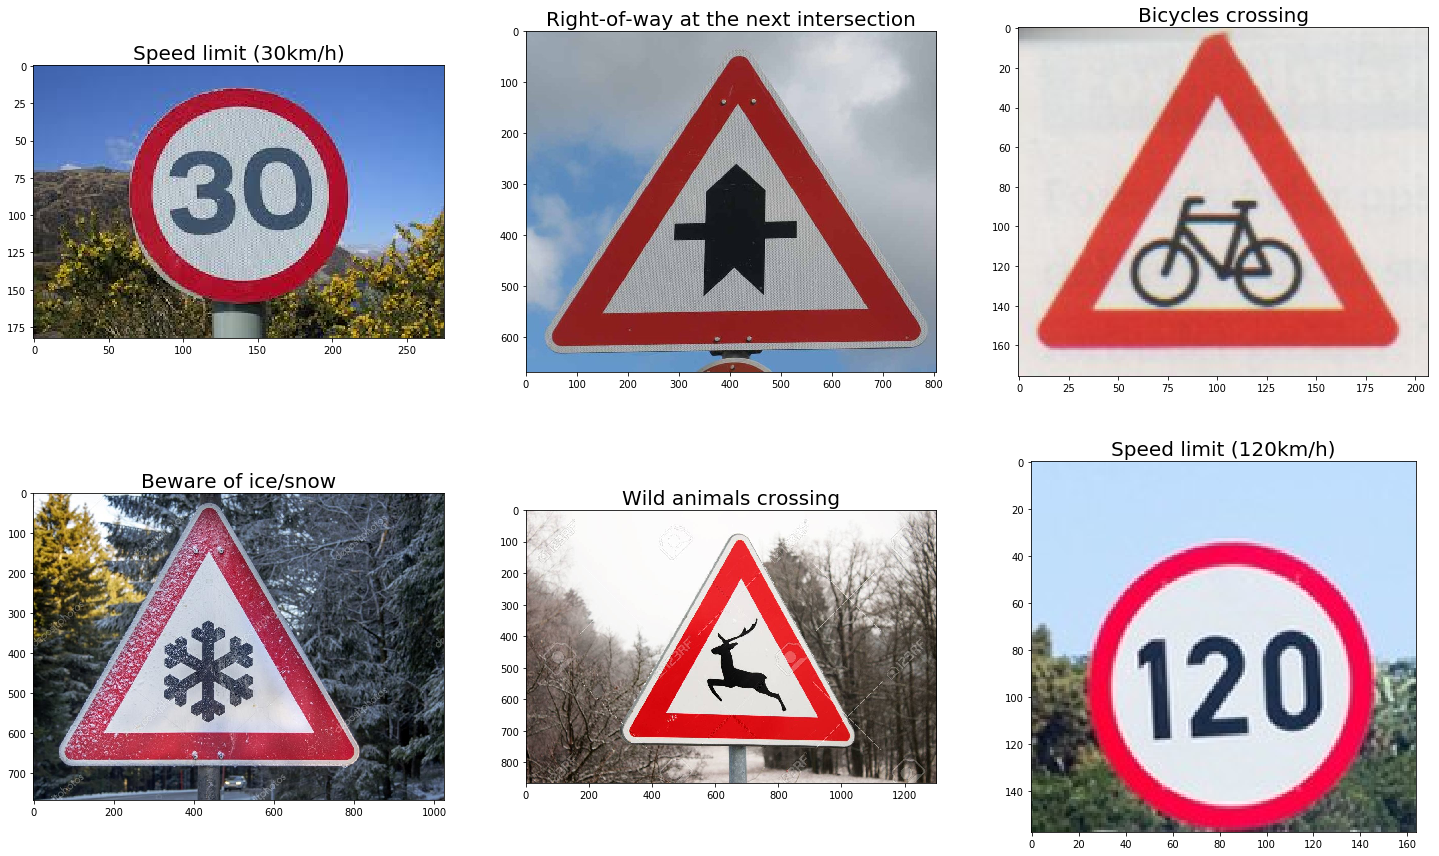

In [182]:
files=glob.glob(path1+'T*.png')

rows = 2
cols = 3
fig, axs = plt.subplots(rows,cols)
fig.set_size_inches(25,15)
i=0
for i in range(len(files)):
    image=cv2.imread(files[i])
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    Imagelabel=data.iloc[int((files[i].split('.')[1]).split('_')[1])][1]
    axs[int(i/cols),i%cols].imshow(image)
    axs[int(i/cols)][i%cols].set_title(Imagelabel, fontsize=20)
    

#fig.savefig('./examples/8.png')

#### Predict the Sign Type for the clear Images

In [210]:
top_predicts=[]
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(savepath))
    for i in range (len(files)):
        img=cv2.imread(files[i])
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(32,32))
        #img=normalize(img)
        img=np.expand_dims(img,axis=0) 
        top_predicts.append(sess.run(top_predictions,feed_dict={x:img,keep_prob:1.0}))
  

INFO:tensorflow:Restoring parameters from ./logs/20191019-132021/SignClassifier.ckpt


In [211]:
rows = 2
cols = 3
fig, axs = plt.subplots(rows,cols)
fig.set_size_inches(25,15)
for i in range(len(files)):
    image=cv2.imread(files[i])
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    Predictedlabel= data.iloc[top_predicts[i][1][0][0]][1]
    Imagelabel=data.iloc[int((files[i].split('.')[1]).split('_')[1])][1]
    axs[int(i/cols),i%cols].imshow(image)
    axs[int(i/cols)][i%cols].set_title('Label:'+Imagelabel+(', The predicted label: {} ').format(Predictedlabel, fontsize=20))


fig.savefig('./examples/9.png')

#### Load and Output the noisy Images

In [212]:
files1=glob.glob(path2+'T*.jpg')

In [213]:
files1

['./examples/Noisy Image\\T-00_2.jpg',
 './examples/Noisy Image\\T_00_1.jpg',
 './examples/Noisy Image\\T_01_1.jpg',
 './examples/Noisy Image\\T_01_3.jpg',
 './examples/Noisy Image\\T_23_1.jpg',
 './examples/Noisy Image\\T_25_5.jpg',
 './examples/Noisy Image\\T_27_1.jpg',
 './examples/Noisy Image\\T_28_0.jpg']

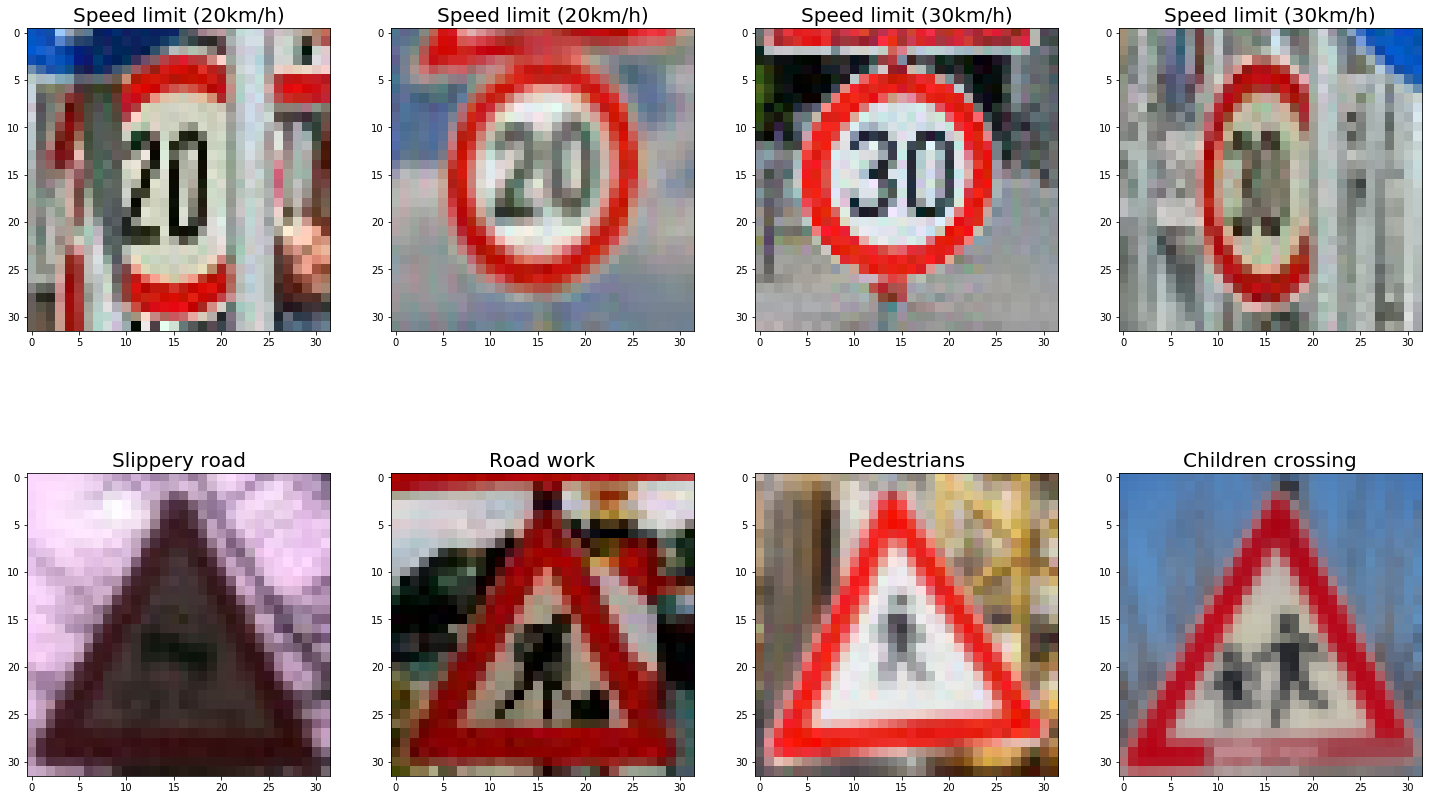

In [215]:

#labels1=[27,1,25,1,28,23,0,0]#from the image name
labels1=[0,0,1,1,23,25,27,28]#from the image name

rows = 2
cols = 4
fig, axs = plt.subplots(rows,cols)
fig.set_size_inches(25,15)
i=0
for label, image in zip(labels1,files1):
    image=cv2.imread(image)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    label= data.iloc[labels1[i]][1]
    axs[int(i/cols),i%cols].imshow(image)
    axs[int(i/cols)][i%cols].set_title( label , fontsize=20)
    i+=1
#fig.savefig('./examples/11.png')

#### Predict the Sign Type for the noisy Images

In [216]:
top_predicts1=[]
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(savepath))
    for i in range (len(files1)):
        img=cv2.imread(files1[i])
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(32,32),interpolation=cv2.INTER_CUBIC)
        img=np.expand_dims(img,axis=0)
        top_predicts1.append(sess.run(top_predictions,feed_dict={x:img,keep_prob:1.0}))

INFO:tensorflow:Restoring parameters from ./logs/20191019-132021/SignClassifier.ckpt


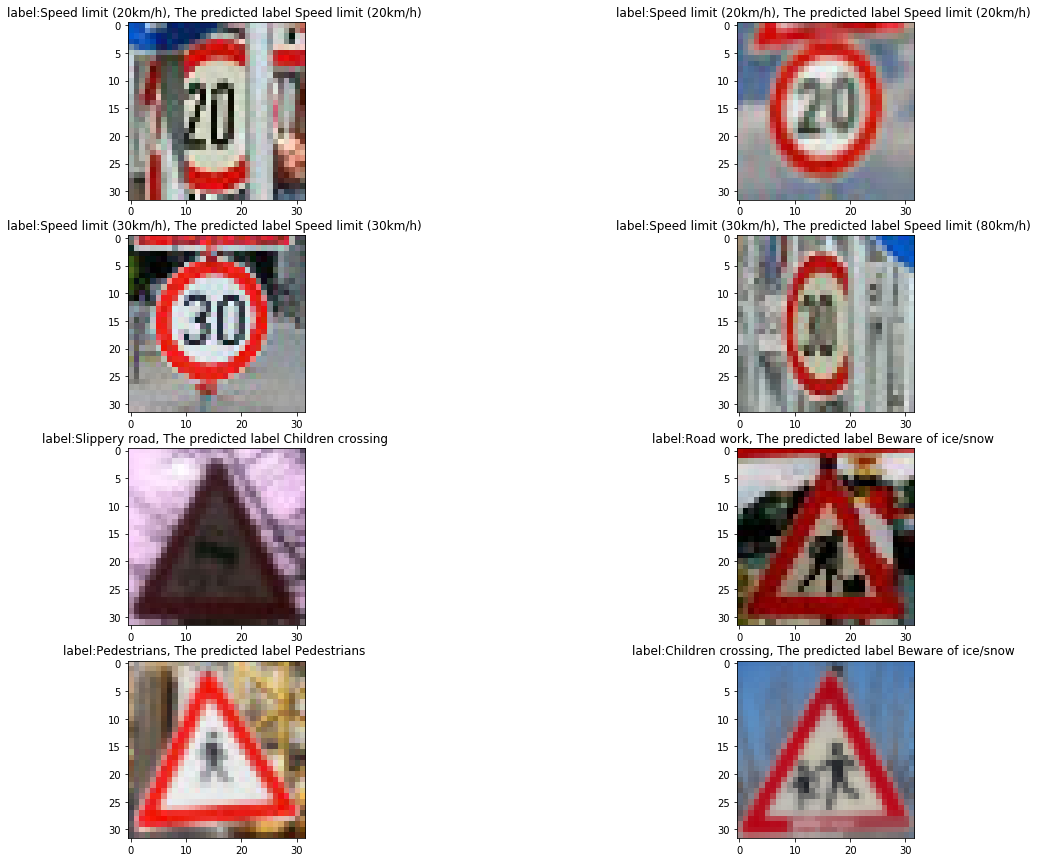

In [223]:
rows = 4
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(20,15))

i=0
for label, image in zip(labels1,files1):
    image=cv2.imread(image)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    labe= data.iloc[label][1]
    predicted=data.iloc[top_predicts1[i][1][0][0]][1]
    axs[int(i/cols),i%cols].imshow(image)
    axs[int(i/cols)][i%cols].set_title('label:'+labe+', The predicted label {} '.format(predicted, fontsize=25))
    i+=1

#fig.savefig('./examples/12.png')

### 6. Analyze the softmax probabilities of the new images


In this section for each of the new images(clear images and noisy images), print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

#### For the clear images

In [208]:
for i in range (len(files)):
    print('------------------------------------------------------------')
    print('The label of the image {}  is {} which has the corresponding predictions of  {} '.format(i,labels_signs[i],top_predicts[i][1]))

------------------------------------------------------------
The label of the image 0  is 1 which has the corresponding predictions of  [[1 0 2 3 4]] 
------------------------------------------------------------
The label of the image 1  is 30 which has the corresponding predictions of  [[11  0  1  2  3]] 
------------------------------------------------------------
The label of the image 2  is 8 which has the corresponding predictions of  [[29  0  1  2  3]] 
------------------------------------------------------------
The label of the image 3  is 31 which has the corresponding predictions of  [[24 28 30 20  0]] 
------------------------------------------------------------
The label of the image 4  is 29 which has the corresponding predictions of  [[29  0  1  2  3]] 
------------------------------------------------------------
The label of the image 5  is 11 which has the corresponding predictions of  [[9 0 1 2 3]] 


#### For the noisy images

In [224]:
for i in range (len(files1)):
    print('------------------------------------------------------------')
    print('The label of the image {}  is {} which has the corresponding predictions of  {} '.format(i, labels1[i],top_predicts1[i][1]))

------------------------------------------------------------
The label of the image 0  is 0 which has the corresponding predictions of  [[0 1 4 2 3]] 
------------------------------------------------------------
The label of the image 1  is 0 which has the corresponding predictions of  [[0 1 2 3 4]] 
------------------------------------------------------------
The label of the image 2  is 1 which has the corresponding predictions of  [[1 0 2 3 4]] 
------------------------------------------------------------
The label of the image 3  is 1 which has the corresponding predictions of  [[ 5  2  7 15  0]] 
------------------------------------------------------------
The label of the image 4  is 23 which has the corresponding predictions of  [[28 29 24 20 30]] 
------------------------------------------------------------
The label of the image 5  is 25 which has the corresponding predictions of  [[30 28  0  1  2]] 
------------------------------------------------------------
The label of the

---

### 7.  Visualize the Neural Network's State with Test Images

This Section acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="./examples/visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 </figcaption>
</figure>
 <p></p> 
 


In [251]:

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, min(featuremap+1,48)) # sets the number of feature maps to show on each row and column
        #plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            

In [255]:
img=x_test[5]
img=np.expand_dims(img,axis=0)
graph = tf.get_default_graph()
conv1= graph.get_tensor_by_name('inception_3a:0')


In [256]:
print(img.shape)
print(conv1)

(1, 32, 32, 3)
Tensor("inception_3a:0", shape=(?, 32, 32, 256), dtype=float32)


In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(savepath))
    outputFeatureMap(img, conv1)

<figure>
 <img src="./examples/13.png" alt="Combined Image" />
 <figcaption>
 <p></p> 
 </figcaption>
</figure>